In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df=df.drop('CustomerID',axis=1)

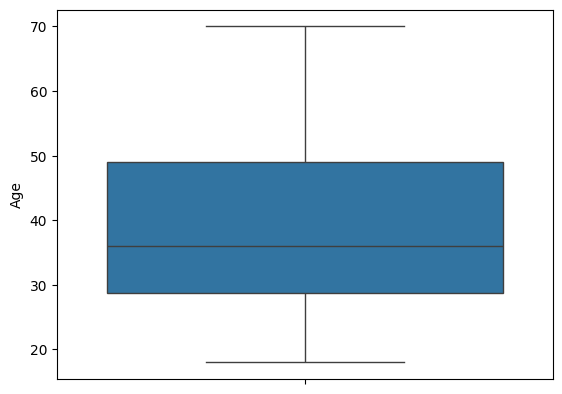

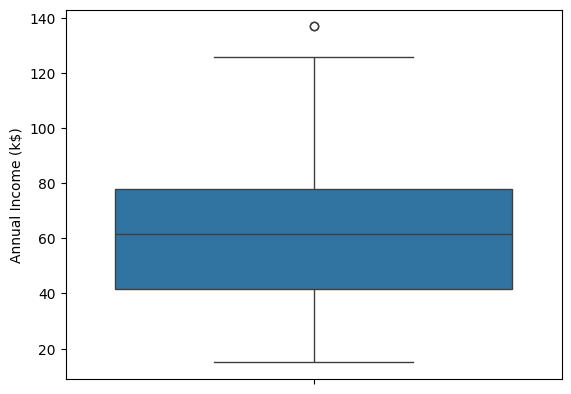

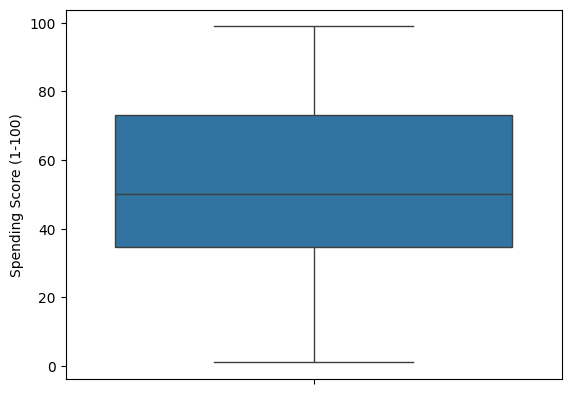

In [9]:
numeric= df.select_dtypes(include="number").columns
for i in numeric:
  sns.boxplot(df[i])
  plt.show()


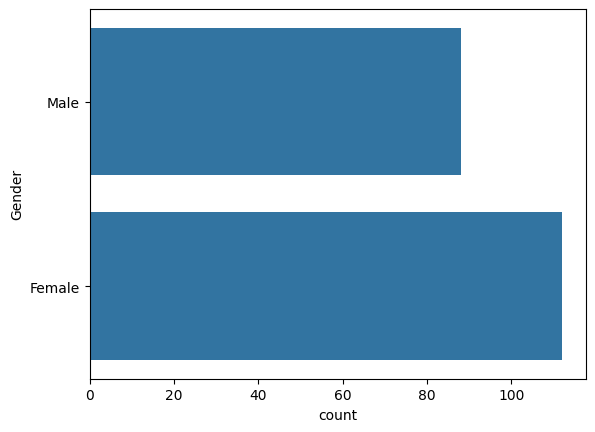

In [10]:
cat=df.select_dtypes(include="object").columns
for i in cat :
  sns.countplot(df[i])
  plt.show()

In [15]:
df_cluster=df.drop('Gender',axis=1)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_cluster=scaler.fit_transform(df_cluster)

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_means=KMeans(n_clusters=3,random_state=2025)
ft_cluster=k_means.fit(df_cluster)
silhouette_score(df_cluster,ft_cluster.labels_)


np.float64(0.3503301017619873)

In [56]:
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = ft_cluster.labels_
df_with_clusters.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,0


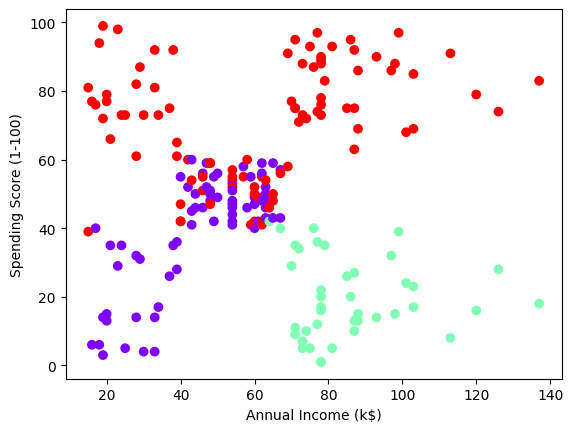

In [57]:
plt.scatter(df_with_clusters['Annual Income (k$)'],df_with_clusters['Spending Score (1-100)'],c=df_with_clusters['Cluster'],cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [58]:
df_with_clusters['Cluster'] = df_with_clusters['Cluster'].map({
    0: 'High Spenders',
    1: 'Average Customers',
    2: 'Cautious Rich'
})
df_with_clusters.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cautious Rich
1,Male,21,15,81,Cautious Rich
2,Female,20,16,6,High Spenders
3,Female,23,16,77,Cautious Rich
4,Female,31,17,40,High Spenders


In [42]:

df_with_clusters= pd.get_dummies(df_with_clusters)
df_with_clusters.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster_Average Customers,Cluster_Cautious Rich,Cluster_High Spenders
0,19,15,39,False,True,False,True,False
1,21,15,81,False,True,False,True,False
2,20,16,6,True,False,False,False,True
3,23,16,77,True,False,False,True,False
4,31,17,40,True,False,False,False,True


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=df_with_clusters.drop('Cluster',axis=1)
y=df_with_clusters['Cluster']

In [61]:
x= pd.get_dummies(df_with_clusters)
x.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster_Average Customers,Cluster_Cautious Rich,Cluster_High Spenders
0,19,15,39,False,True,False,True,False
1,21,15,81,False,True,False,True,False
2,20,16,6,True,False,False,False,True
3,23,16,77,True,False,False,True,False
4,31,17,40,True,False,False,False,True


In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2025)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
tree= DecisionTreeClassifier()
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

1.0
[[ 9  0  0]
 [ 0 17  0]
 [ 0  0 14]]
                   precision    recall  f1-score   support

Average Customers       1.00      1.00      1.00         9
    Cautious Rich       1.00      1.00      1.00        17
    High Spenders       1.00      1.00      1.00        14

         accuracy                           1.00        40
        macro avg       1.00      1.00      1.00        40
     weighted avg       1.00      1.00      1.00        40

